# HackerEarth Predict the cost to ship the sculptures Hackathon

In [1]:
# Importing All the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

# Displaying all the rows and columns in a dataframe
pd.pandas.set_option('display.max_columns', None)
pd.pandas.set_option('display.max_rows', None)

In [2]:
train_data = pd.read_csv('train.csv')
print(train_data.shape)
train_data.head(10)

(6500, 20)


,Customer Id,Artist Name,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Customer Location,Cost
0,fffe3900350033003300,Billy Jenkins,0.26,17.0,6.0,4128.0,Brass,13.91,16.27,Yes,Yes,No,Airways,No,Working Class,No,06/07/15,06/03/15,"New Michelle, OH 50777",-283.29
1,fffe3800330031003900,Jean Bryant,0.28,3.0,3.0,61.0,Brass,6.83,15.00,No,No,No,Roadways,No,Working Class,No,03/06/17,03/05/17,"New Michaelport, WY 12072",-159.96
2,fffe3600370035003100,Laura Miller,0.07,8.0,5.0,237.0,Clay,4.96,21.18,No,No,No,Roadways,Yes,Working Class,Yes,03/09/15,03/08/15,"Bowmanshire, WA 19241",-154.29
3,fffe350031003300,Robert Chaires,0.12,9.0,NaN,NaN,Aluminium,5.81,16.31,No,No,No,NaN,No,Wealthy,Yes,05/24/15,05/20/15,"East Robyn, KY 86375",-161.16
4,fffe3900320038003400,Rosalyn Krol,0.15,17.0,6.0,324.0,Aluminium,3.18,11.94,Yes,Yes,Yes,Airways,No,Working Class,No,12/18/16,12/14/16,"Aprilside, PA 52793",-159.23
5,fffe3300390039003900,Tracy Francis,0.99,46.0,19.0,1178.0,Wood,6.16,16.88,No,Yes,No,NaN,No,Wealthy,No,08/28/15,08/26/15,"Maddenberg, AL 43096",-1922.78
6,fffe3800360033003700,David Hawes,0.64,17.0,9.0,7264.0,Brass,8.26,90.67,No,Yes,No,Roadways,No,Working Class,No,06/05/16,06/02/16,"South Matthew, WV 76033",-1536.66
7,fffe3800300039003800,David Osher,0.74,23.0,10.0,3287.0,Clay,12.81,13.25,Yes,No,No,Waterways,Yes,Wealthy,No,06/04/19,05/31/19,"Davidmouth, CA 37824",-422.42
8,fffe3800330032003900,Arnold Reel,0.00,6.0,4.0,108.0,Clay,3.98,19.76,Yes,No,No,Waterways,Yes,Working Class,Yes,08/27/18,08/23/18,"Lisaville, ND 43925",-160.10
9,fffe3800310031003800,James Comfort,0.12,23.0,9.0,195226.0,Marble,245.63,49.25,No,No,No,Roadways,No,Working Class,No,07/14/16,07/10/16,"Jacobland, WV 85997",-834.27


In [3]:
test_data = pd.read_csv('test.csv')
print(test_data.shape)
test_data.head()

(3500, 19)


,Customer Id,Artist Name,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Customer Location
0,fffe3400310033003300,James Miller,0.35,53.0,18.0,871.0,Wood,5.98,19.11,Yes,Yes,No,Airways,No,Working Class,No,07/03/17,07/06/17,"Santoshaven, IA 63481"
1,fffe3600350035003400,Karen Vetrano,0.67,7.0,4.0,108.0,Clay,6.92,13.96,No,No,No,Roadways,Yes,Working Class,No,05/02/16,05/02/16,"Ericksonton, OH 98253"
2,fffe3700360030003500,Roseanne Gaona,0.61,6.0,5.0,97.0,Aluminium,4.23,13.62,Yes,No,No,Airways,No,Working Class,No,01/04/18,01/06/18,APO AP 83453
3,fffe350038003600,Todd Almanza,0.14,15.0,8.0,757.0,Clay,6.28,23.79,No,Yes,No,Roadways,Yes,Wealthy,No,09/14/17,09/17/17,"Antonioborough, AL 54778"
4,fffe3500390032003500,Francis Rivero,0.63,10.0,4.0,1673.0,Marble,4.39,17.83,No,Yes,Yes,Roadways,No,Working Class,Yes,12/03/17,12/02/17,"Lake Frances, LA 03040"


### Finding Missing Values 

In [4]:
# In Training Data
train_data.isnull().sum()

Customer Id                 0
Artist Name                 0
Artist Reputation         750
Height                    375
Width                     584
Weight                    587
Material                  764
Price Of Sculpture          0
Base Shipping Price         0
International               0
Express Shipment            0
Installation Included       0
Transport                1392
Fragile                     0
Customer Information        0
Remote Location           771
Scheduled Date              0
Delivery Date               0
Customer Location           0
Cost                        0
dtype: int64

In [5]:
# In Testing Data
test_data.isnull().sum()

Customer Id                0
Artist Name                0
Artist Reputation        222
Height                   119
Width                    141
Weight                   149
Material                   0
Price Of Sculpture         0
Base Shipping Price        0
International              0
Express Shipment           0
Installation Included      0
Transport                232
Fragile                    0
Customer Information       0
Remote Location            0
Scheduled Date             0
Delivery Date              0
Customer Location          0
dtype: int64

### Finding Numerical Features

In [6]:
# Numerical Variables in Training Data
train = train_data.copy()
train_numerical = [i for i in train.columns if train[i].dtypes !='O']
train_numerical

['Artist Reputation',
 'Height',
 'Width',
 'Weight',
 'Price Of Sculpture',
 'Base Shipping Price',
 'Cost']

In [7]:
# Numerical Variables in Testing Data
test = test_data.copy()
test_numerical = [i for i in test.columns if test[i].dtypes !='O']
test_numerical

['Artist Reputation',
 'Height',
 'Width',
 'Weight',
 'Price Of Sculpture',
 'Base Shipping Price']

### Finding Categorical Features

In [8]:
# Categorical Variables in Training Data
train_categorical = [i for i in train.columns if train[i].dtypes =='O']
print(len(train_categorical))
train_categorical

13


['Customer Id',
 'Artist Name',
 'Material',
 'International',
 'Express Shipment',
 'Installation Included',
 'Transport',
 'Fragile',
 'Customer Information',
 'Remote Location',
 'Scheduled Date',
 'Delivery Date',
 'Customer Location']

In [9]:
# Categorical Variables in Testing data
test_categorical = [i for i in test.columns if test[i].dtypes =='O']
print(len(test_categorical))
test_categorical

13


['Customer Id',
 'Artist Name',
 'Material',
 'International',
 'Express Shipment',
 'Installation Included',
 'Transport',
 'Fragile',
 'Customer Information',
 'Remote Location',
 'Scheduled Date',
 'Delivery Date',
 'Customer Location']

## Exploratory Data Analysis

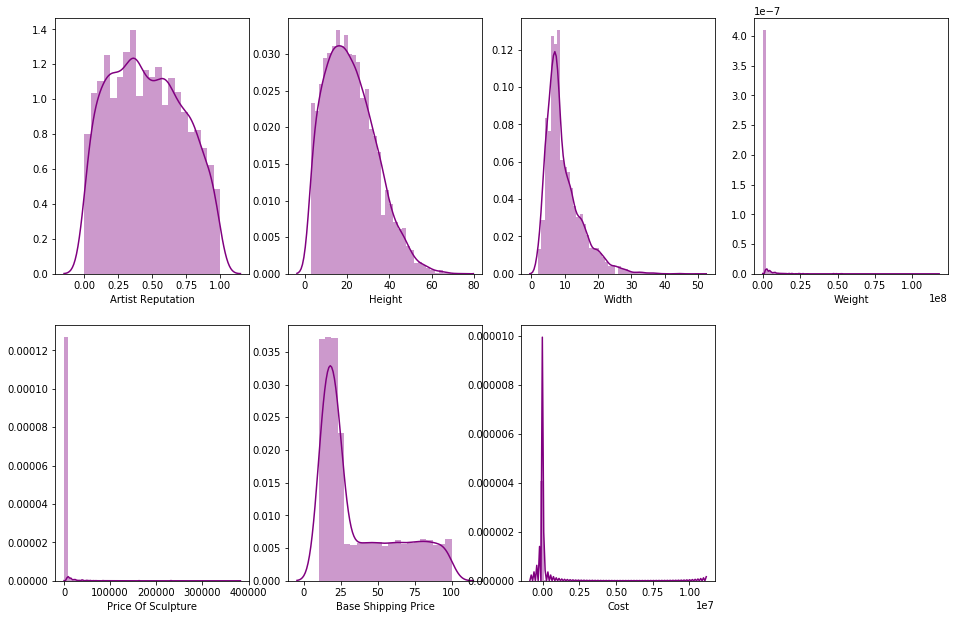

In [10]:
# Numerical Distributions of Training Data
fig = plt.figure(figsize=(16,16))
for i in range(len(train_numerical)):
    fig.add_subplot(3, 4, i+1)
    sns.distplot(train[train_numerical].iloc[:,i],color="purple")
plt.show()

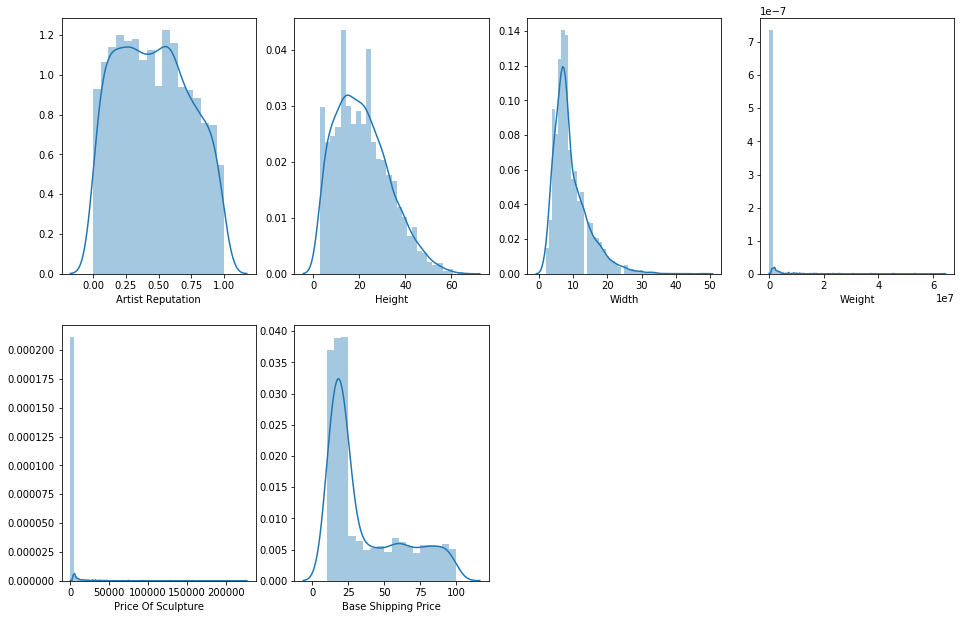

In [11]:
# Numerical Distributions of Testing Data
fig = plt.figure(figsize=(16,16))
for i in range(len(test_numerical)):
    fig.add_subplot(3, 4, i+1)
    sns.distplot(test[test_numerical].iloc[:,i])
plt.show()

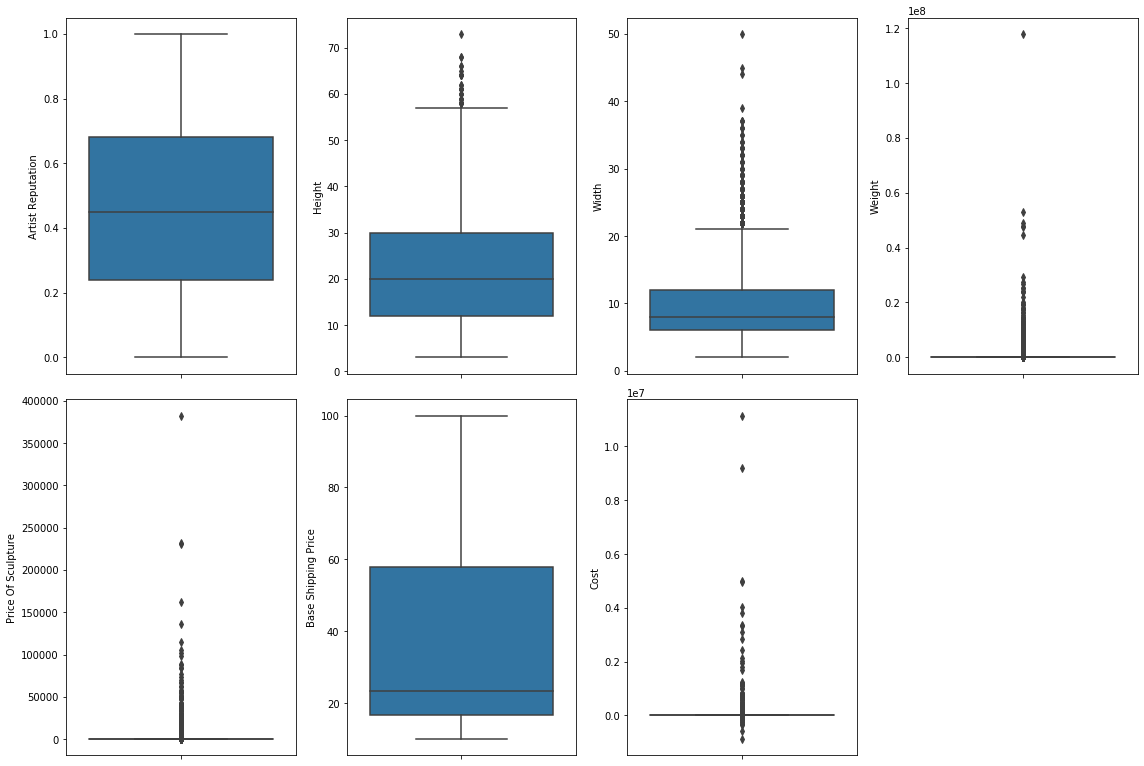

In [13]:
# Box plots of Numerical Features 
fig = plt.figure(figsize=(16,16))
for i in range(len(train_numerical)):
    fig.add_subplot(3, 4, i+1)
    sns.boxplot(y=train[train_numerical].iloc[:,i])
plt.tight_layout()
plt.show()

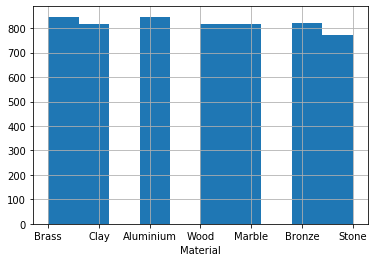

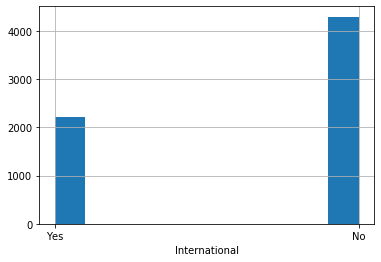

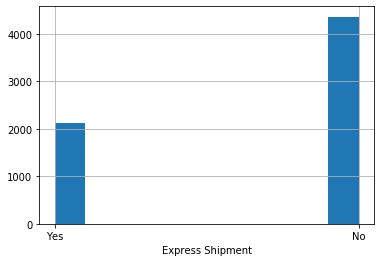

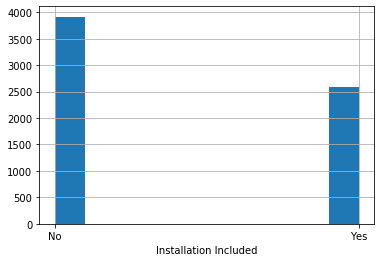

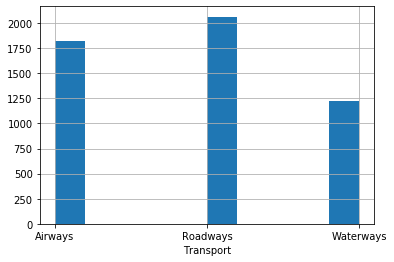

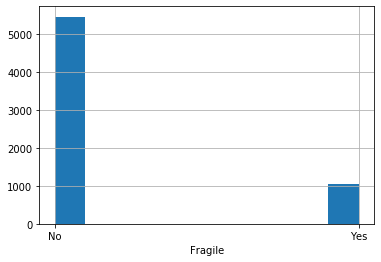

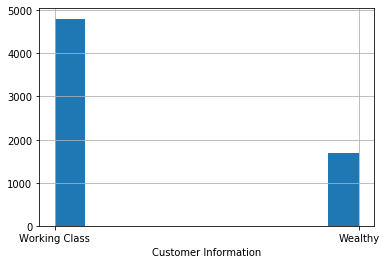

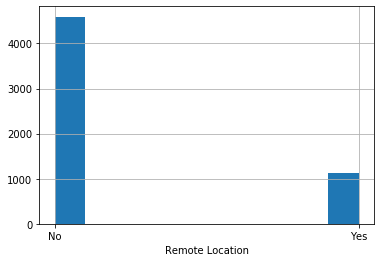

In [17]:
# Categorical Features
for i in range(len(train_categorical)):
    if len(train[train_categorical].iloc[:,i].unique()) < 10:      
        train[train_categorical].iloc[:,i].hist()
        plt.xlabel(train[train_categorical].columns[i])
        plt.show()
    else:
        continue

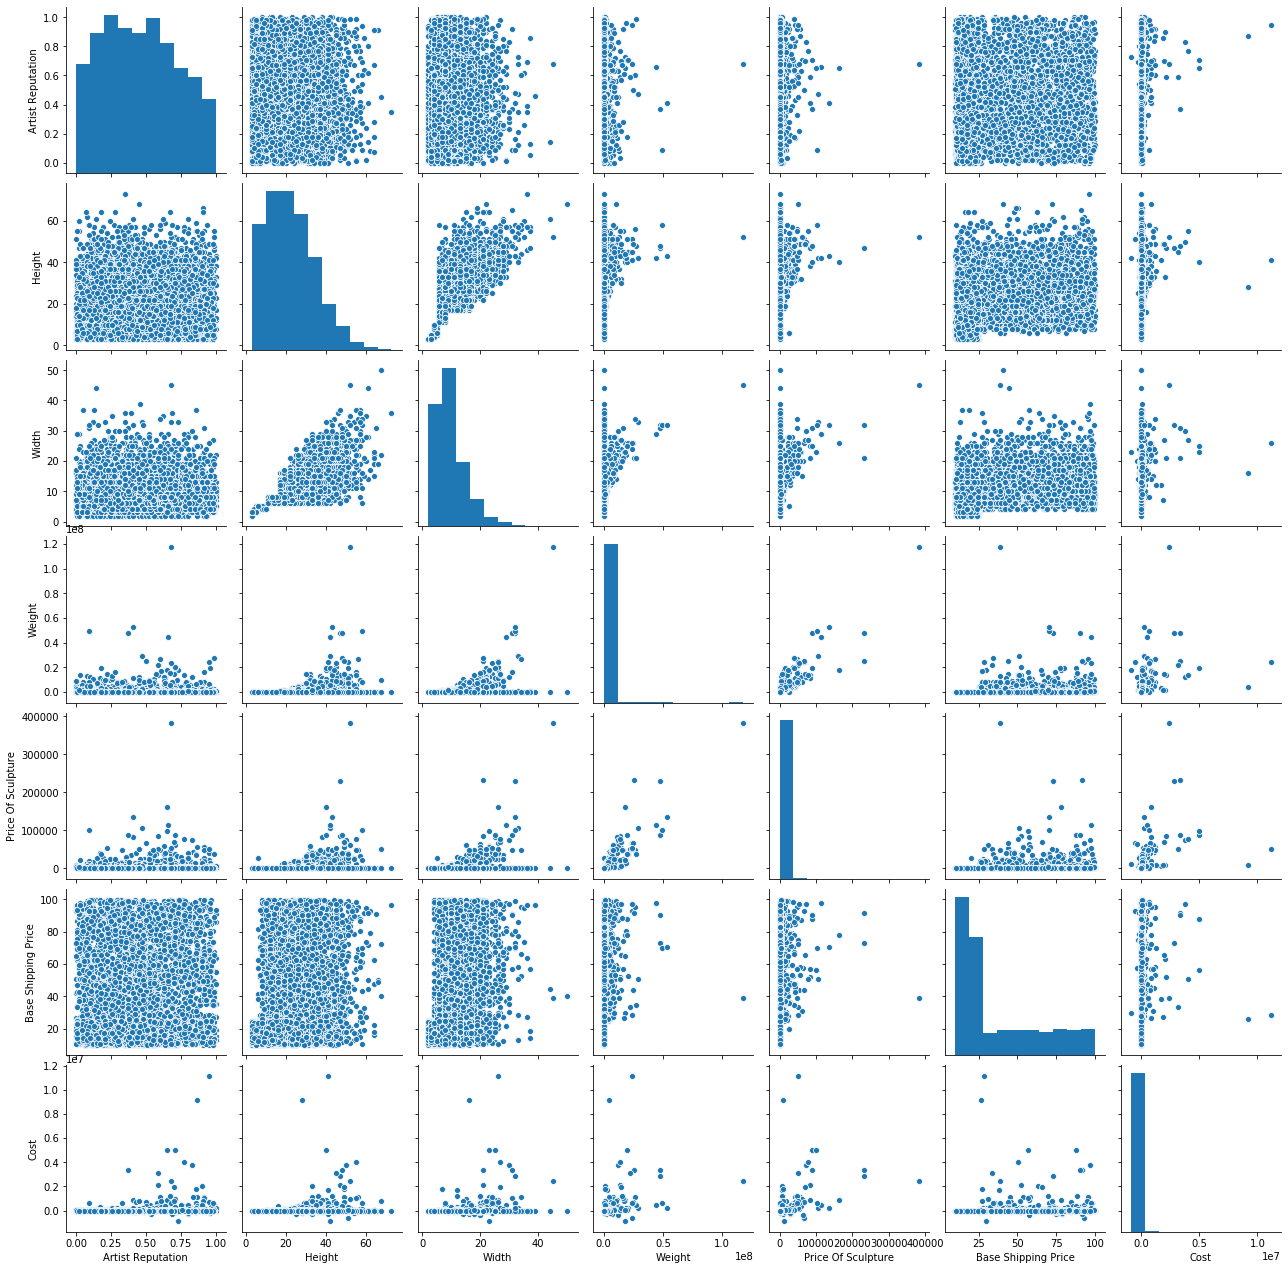

In [19]:
# Pair Plot
sns.pairplot(train)
plt.show()

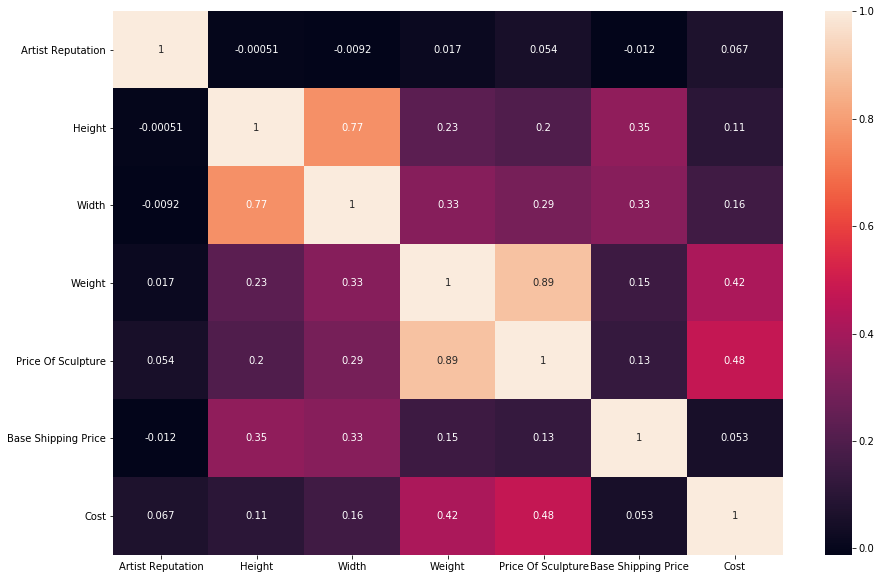

In [20]:
# Correlation Heat Map
plt.figure(figsize=(15,10))
sns.heatmap(train.corr(),annot=True)

- Weight and Price of Sculpture are a Correlation of 0.89

### Handling Missing Values 

In [23]:
# Missing Values in Numerical Data (Training)
train[train_numerical].isnull().sum()

Artist Reputation      750
Height                 375
Width                  584
Weight                 587
Price Of Sculpture       0
Base Shipping Price      0
Cost                     0
dtype: int64

In [24]:
# Missing Values in Numerical Data (Testing)
test[test_numerical].isnull().sum()

Artist Reputation      222
Height                 119
Width                  141
Weight                 149
Price Of Sculpture       0
Base Shipping Price      0
dtype: int64

In [25]:
# For Training Data
train['Artist Reputation'] = train['Artist Reputation'].fillna(train['Artist Reputation'].median())
train['Weight'] = train['Weight'].fillna(train['Weight'].median())
train['Height'] = train['Height'].fillna(train['Height'].median())
train['Width'] = train['Width'].fillna(train['Width'].median())

# For Testing Data
test['Artist Reputation'] = test['Artist Reputation'].fillna(test['Artist Reputation'].median())
test['Weight'] = test['Weight'].fillna(test['Weight'].median())
test['Height'] = test['Height'].fillna(test['Height'].median())
test['Width'] = test['Width'].fillna(test['Width'].median())

In [26]:
train[train_numerical].isnull().sum()

Artist Reputation      0
Height                 0
Width                  0
Weight                 0
Price Of Sculpture     0
Base Shipping Price    0
Cost                   0
dtype: int64

In [27]:
# Testing Data
test[test_numerical].isnull().sum()

Artist Reputation      0
Height                 0
Width                  0
Weight                 0
Price Of Sculpture     0
Base Shipping Price    0
dtype: int64

In [28]:
# Missing Values in Categorical Data (Training)
train[train_categorical].isnull().sum()

Customer Id                 0
Artist Name                 0
Material                  764
International               0
Express Shipment            0
Installation Included       0
Transport                1392
Fragile                     0
Customer Information        0
Remote Location           771
Scheduled Date              0
Delivery Date               0
Customer Location           0
dtype: int64

In [29]:
# Missing Values in Categorical Data (Testing)
test[test_categorical].isnull().sum()

Customer Id                0
Artist Name                0
Material                   0
International              0
Express Shipment           0
Installation Included      0
Transport                232
Fragile                    0
Customer Information       0
Remote Location            0
Scheduled Date             0
Delivery Date              0
Customer Location          0
dtype: int64

- Replacing null values in Transport with Roadways 
- Replacing null values in material with unknown
- Replacing null values in Remote Location with NO 


In [30]:
# For Training Data
train['Transport'] = train['Transport'].fillna('Roadways')
train['Material'] = train['Material'].fillna('Unknown')
train['Remote Location'] = train['Remote Location'].fillna('No')

# For Testing Data
test['Transport'] = test['Transport'].fillna('Roadways')

In [31]:
train[train_categorical].isnull().sum()

Customer Id              0
Artist Name              0
Material                 0
International            0
Express Shipment         0
Installation Included    0
Transport                0
Fragile                  0
Customer Information     0
Remote Location          0
Scheduled Date           0
Delivery Date            0
Customer Location        0
dtype: int64

In [32]:
# Testing Data
test[test_categorical].isnull().sum()

Customer Id              0
Artist Name              0
Material                 0
International            0
Express Shipment         0
Installation Included    0
Transport                0
Fragile                  0
Customer Information     0
Remote Location          0
Scheduled Date           0
Delivery Date            0
Customer Location        0
dtype: int64

###  Drooping Unwanted Columns

In [33]:
unwanted = ['Customer Id','Artist Name','Customer Location']
train = train.drop(unwanted, axis=1)
test = test.drop(unwanted, axis=1)
print(train.shape,test.shape)

(6500, 17) (3500, 16)


### Deriving Features from Scheduled and Delivery Date

In [35]:
# For Training Data
train['Scheduled Date'] = pd.to_datetime(train['Scheduled Date'])
train['Delivery Date'] = pd.to_datetime(train['Delivery Date'])

# For Testing data
test['Scheduled Date'] = pd.to_datetime(test['Scheduled Date'])
test['Delivery Date'] = pd.to_datetime(test['Delivery Date'])

In [36]:
train['scheduleDiff'] = (train['Delivery Date'] - train['Scheduled Date']).map(lambda x:str(x).split()[0])
train['scheduleDiff'] = pd.to_numeric(train['scheduleDiff'])

# Testing data

test['scheduleDiff'] = (test['Delivery Date'] - test['Scheduled Date']).map(lambda x:str(x).split()[0])
test['scheduleDiff'] = pd.to_numeric(test['scheduleDiff'])

In [37]:
print(train.shape)
train.head()

(6500, 18)


,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Cost,scheduleDiff
0,0.26,17.0,6.0,4128.0,Brass,13.91,16.27,Yes,Yes,No,Airways,No,Working Class,No,2015-06-07,2015-06-03,-283.29,-4
1,0.28,3.0,3.0,61.0,Brass,6.83,15.00,No,No,No,Roadways,No,Working Class,No,2017-03-06,2017-03-05,-159.96,-1
2,0.07,8.0,5.0,237.0,Clay,4.96,21.18,No,No,No,Roadways,Yes,Working Class,Yes,2015-03-09,2015-03-08,-154.29,-1
3,0.12,9.0,8.0,3102.0,Aluminium,5.81,16.31,No,No,No,Roadways,No,Wealthy,Yes,2015-05-24,2015-05-20,-161.16,-4
4,0.15,17.0,6.0,324.0,Aluminium,3.18,11.94,Yes,Yes,Yes,Airways,No,Working Class,No,2016-12-18,2016-12-14,-159.23,-4


In [38]:
print(test.shape)
test.head()

(3500, 17)


,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,scheduleDiff
0,0.35,53.0,18.0,871.0,Wood,5.98,19.11,Yes,Yes,No,Airways,No,Working Class,No,2017-07-03,2017-07-06,3
1,0.67,7.0,4.0,108.0,Clay,6.92,13.96,No,No,No,Roadways,Yes,Working Class,No,2016-05-02,2016-05-02,0
2,0.61,6.0,5.0,97.0,Aluminium,4.23,13.62,Yes,No,No,Airways,No,Working Class,No,2018-01-04,2018-01-06,2
3,0.14,15.0,8.0,757.0,Clay,6.28,23.79,No,Yes,No,Roadways,Yes,Wealthy,No,2017-09-14,2017-09-17,3
4,0.63,10.0,4.0,1673.0,Marble,4.39,17.83,No,Yes,Yes,Roadways,No,Working Class,Yes,2017-12-03,2017-12-02,-1


In [39]:
# For Training Data
train = train.drop(['Scheduled Date','Delivery Date'],axis=1)
# For Testing Data
test = test.drop(['Scheduled Date','Delivery Date'],axis=1)
print(train.shape,test.shape)

(6500, 16) (3500, 15)


### Encoding Categorical Features

In [40]:
# Finding Unique Categories in Categorical Features (Training)
train_categorical = [i for i in train.columns if train[i].dtypes=='O']
for i in train_categorical:
    print("{} has {} unique categories".format(i,len(train[i].unique())))

Material has 8 unique categories
International has 2 unique categories
Express Shipment has 2 unique categories
Installation Included has 2 unique categories
Transport has 3 unique categories
Fragile has 2 unique categories
Customer Information has 2 unique categories
Remote Location has 2 unique categories


In [42]:
# Finding Unique Categories in Categorical Features (Testing)
test_categorical = [i for i in test.columns if test[i].dtypes=='O']
for i in test_categorical:
    print("{} has {} unique categories".format(i,len(test[i].unique())))

Material has 7 unique categories
International has 2 unique categories
Express Shipment has 2 unique categories
Installation Included has 2 unique categories
Transport has 3 unique categories
Fragile has 2 unique categories
Customer Information has 2 unique categories
Remote Location has 2 unique categories


In [43]:
train['Material'].unique()

array(['Brass', 'Clay', 'Aluminium', 'Wood', 'Marble', 'Bronze', 'Stone',
       'Unknown'], dtype=object)

In [44]:
test['Material'].unique()

array(['Wood', 'Clay', 'Aluminium', 'Marble', 'Brass', 'Stone', 'Bronze'],
      dtype=object)

In [45]:
encode = {'Unknown':0,'Brass':1,'Clay':2,'Aluminium':3,'Wood':4,'Marble':5,'Bronze':6,'Stone':7}
train['Material'] = train['Material'].replace(encode)

In [46]:
test_encode = {'Brass':1,'Clay':2,'Aluminium':3,'Wood':4,'Marble':5,'Bronze':6,'Stone':7}
test['Material'] = test['Material'].replace(test_encode)

In [47]:
test.head()

,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,scheduleDiff
0,0.35,53.0,18.0,871.0,4,5.98,19.11,Yes,Yes,No,Airways,No,Working Class,No,3
1,0.67,7.0,4.0,108.0,2,6.92,13.96,No,No,No,Roadways,Yes,Working Class,No,0
2,0.61,6.0,5.0,97.0,3,4.23,13.62,Yes,No,No,Airways,No,Working Class,No,2
3,0.14,15.0,8.0,757.0,2,6.28,23.79,No,Yes,No,Roadways,Yes,Wealthy,No,3
4,0.63,10.0,4.0,1673.0,5,4.39,17.83,No,Yes,Yes,Roadways,No,Working Class,Yes,-1


In [48]:
# To avoid dummy variable trap
# Training Data
train = pd.get_dummies(train,drop_first=True)
# Testing Data
test = pd.get_dummies(test,drop_first=True)
print(train.shape,test.shape)

(6500, 17) (3500, 16)


In [49]:
train.head()

,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,Cost,scheduleDiff,International_Yes,Express Shipment_Yes,Installation Included_Yes,Transport_Roadways,Transport_Waterways,Fragile_Yes,Customer Information_Working Class,Remote Location_Yes
0,0.26,17.0,6.0,4128.0,1,13.91,16.27,-283.29,-4,1,1,0,0,0,0,1,0
1,0.28,3.0,3.0,61.0,1,6.83,15.00,-159.96,-1,0,0,0,1,0,0,1,0
2,0.07,8.0,5.0,237.0,2,4.96,21.18,-154.29,-1,0,0,0,1,0,1,1,1
3,0.12,9.0,8.0,3102.0,3,5.81,16.31,-161.16,-4,0,0,0,1,0,0,0,1
4,0.15,17.0,6.0,324.0,3,3.18,11.94,-159.23,-4,1,1,1,0,0,0,1,0


In [50]:
test.head()

,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,scheduleDiff,International_Yes,Express Shipment_Yes,Installation Included_Yes,Transport_Roadways,Transport_Waterways,Fragile_Yes,Customer Information_Working Class,Remote Location_Yes
0,0.35,53.0,18.0,871.0,4,5.98,19.11,3,1,1,0,0,0,0,1,0
1,0.67,7.0,4.0,108.0,2,6.92,13.96,0,0,0,0,1,0,1,1,0
2,0.61,6.0,5.0,97.0,3,4.23,13.62,2,1,0,0,0,0,0,1,0
3,0.14,15.0,8.0,757.0,2,6.28,23.79,3,0,1,0,1,0,1,0,0
4,0.63,10.0,4.0,1673.0,5,4.39,17.83,-1,0,1,1,1,0,0,1,1


In [51]:
# applying log on target feature with abs as it has many negative values
Train = train.copy()
Train['Cost'] = np.log1p(abs(Train['Cost']))
print(Train['Cost'].min(), Train.shape)
Train.head()

4.466712392840524 (6500, 17)


,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,Cost,scheduleDiff,International_Yes,Express Shipment_Yes,Installation Included_Yes,Transport_Roadways,Transport_Waterways,Fragile_Yes,Customer Information_Working Class,Remote Location_Yes
0,0.26,17.0,6.0,4128.0,1,13.91,16.27,5.649995,-4,1,1,0,0,0,0,1,0
1,0.28,3.0,3.0,61.0,1,6.83,15.00,5.081156,-1,0,0,0,1,0,0,1,0
2,0.07,8.0,5.0,237.0,2,4.96,21.18,5.045294,-1,0,0,0,1,0,1,1,1
3,0.12,9.0,8.0,3102.0,3,5.81,16.31,5.088584,-4,0,0,0,1,0,0,0,1
4,0.15,17.0,6.0,324.0,3,3.18,11.94,5.076610,-4,1,1,1,0,0,0,1,0


In [52]:
# shuffle samples
Train = Train.sample(frac=1, random_state=12).reset_index(drop=True)
# Independent and Dependent Variables
x = Train.drop('Cost',axis=1)
y = Train['Cost']

In [53]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=12)

In [54]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(5200, 16) (1300, 16) (5200,) (1300,)


In [55]:
# Performing MinmaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns)
# scale test data with transform()
x_test = pd.DataFrame(scaler.transform(x_test), columns=x_test.columns)

In [56]:
x_train.describe()

,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,scheduleDiff,International_Yes,Express Shipment_Yes,Installation Included_Yes,Transport_Roadways,Transport_Waterways,Fragile_Yes,Customer Information_Working Class,Remote Location_Yes
count,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000
mean,0.463352,0.266736,0.173189,0.003001,0.497995,0.003200,0.303077,0.494808,0.334038,0.331346,0.404038,0.526731,0.188654,0.158462,0.738077,0.173654
std,0.252149,0.165980,0.119409,0.021129,0.323310,0.024176,0.297448,0.303935,0.471699,0.470742,0.490752,0.499333,0.391271,0.365208,0.439723,0.378848
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.270000,0.142857,0.093023,0.000005,0.285714,0.000006,0.074461,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.450000,0.242857,0.139535,0.000026,0.428571,0.000013,0.148533,0.500000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,0.650000,0.371429,0.209302,0.000224,0.714286,0.000218,0.530007,0.750000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Using Random Forest Algorithm

In [57]:
from sklearn.ensemble import RandomForestRegressor
rand = RandomForestRegressor()
rand.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [58]:
y_pred = rand.predict(x_test)

In [59]:
print(rand.score(x_train,y_train) ,rand.score(x_test,y_test))

0.9944047116598592 0.9623421797879156


In [60]:
from sklearn import metrics
print("Mean Square Error: {}".format(metrics.mean_squared_error(y_test,y_pred)))
print("Mean Absolute Error: {}".format(metrics.mean_absolute_error(y_test,y_pred)))
print("Root Mean Square Error: {}".format(np.sqrt(metrics.mean_squared_error(y_test,y_pred))))

Mean Square Error: 0.10115164582437164
Mean Absolute Error: 0.2021480328044058
Root Mean Square Error: 0.3180434653068219


In [61]:
score = 100*max(0, 1-metrics.mean_squared_log_error(y_test, y_pred))
score

99.8653142986015

In [62]:
# Fitting on Original Data
rand.fit(x,y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [63]:
y_pred = rand.predict(test)

In [64]:
y_pred = np.expm1(y_pred)

In [66]:
sub = pd.DataFrame({
    'Customer Id': test_data['Customer Id'],
    'Cost': y_pred,
})
sub.head()

,Customer Id,Cost
0,fffe3400310033003300,226.154160
1,fffe3600350035003400,295.523585
2,fffe3700360030003500,212.104052
3,fffe350038003600,191.345682
4,fffe3500390032003500,306.856178


In [67]:
sub.to_csv('submission_1.csv',index=False)